# Vázquez Hernández Carlos Iván.  Tarea 4

IMPORTANTE: Para obtener los pesos y los ceros de los polinomios de legendre se uso la biblioteca gaussxw de Mark newman, por lo que para que los códigos funcionen se necesita tener la biblioteca en la misma carpeta de tu programa e importarla como 
from gaussxw import gaussxwab

# PROBLEMA 1 Límite de difracción de un telescopio

La intensidad de la luz en un patron de difracción circular que consta de un punto central rodeado por una serie de anillos concentricos esta dada por:
\begin{equation}
    I(r)=\left(\frac{J_i(kr)}{kr}\right)^{2}
\end{equation}

Donde r es la distancia en el plani focal desde el centro del patrón de difracción con $k=\frac{2\pi}{\lambda}$ y $J_1(x)$ es una función de Bessel. Las funciones de Bessel estan dadas por:
\begin{equation}
    J_m=\frac{1}{\pi}\int^{\pi}_{0}cos(m\theta -xsin(\theta))d\theta
\end{equation}
Donde m es un entero no negativo y $x\geq$0

(a) Escribe una función $J(mx)$ que calcule el valor de $J_m$ usando la regla de Simpson con N=1000 puntos. Utiliza dicha función en un programa para gráficar, en un solo gráfico las funciones de Bessel $J_0,J_1,J_2$ como una funcón de $x$ (de $x=0$ a $x=20$)

In [1]:
def Simpson_j(f,m,x,a,b,N):
    h=(b-a)/N
    h=h/2
    par=0
    impar=0
    fa=f(m,x,a)
    fb=f(m,x,b)
    for i in range(0,N):
        impar+=f(m,x,a+(2*i+1)*h)
    for k in range(0,N-1):
        par+=f(m,x,a+2*k*h)
    par=2*par
    impar=4*impar
    
    integral=(h/3)*(fa+fb+par+impar)
    return integral

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def int(m,x,t):
    return np.cos(m*t-(x*np.sin(t)))
def J(m,x):
    i=Simpson_j(int,m,x,0,np.pi,1000)
    jm=(1/(np.pi))*i
    return jm

In [3]:
x=np.linspace(0,20,1000)
j0=J(0,x)
j1=J(1,x)
j2=J(2,x)

#for i in x:
 #   j0.append(J(0,i))
  #  j1.append(J(1,i))
   # j2.append(J(2,i))

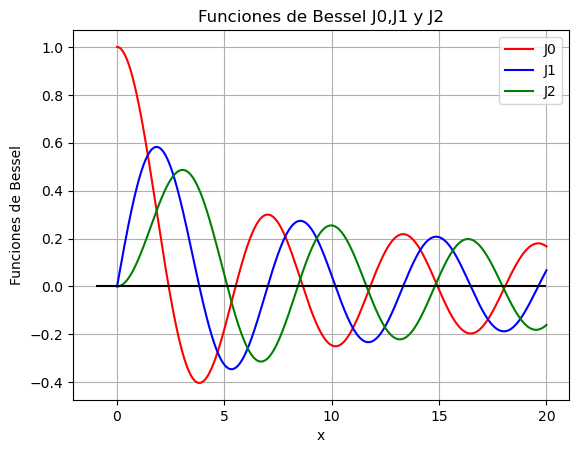

In [4]:
plt.plot(x,j0,color='red',label='J0')
plt.plot(x,j1,color='blue',label='J1')
plt.plot(x,j2,color='green',label='J2')
plt.hlines(y=0,xmin=-1,xmax=20,color='black')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('Funciones de Bessel')
plt.title('Funciones de Bessel J0,J1 y J2')
plt.grid(True)

(b) Compara tus resultados con los proporcionados con la biblioteca de scipy que implementan la regla de Simpson.

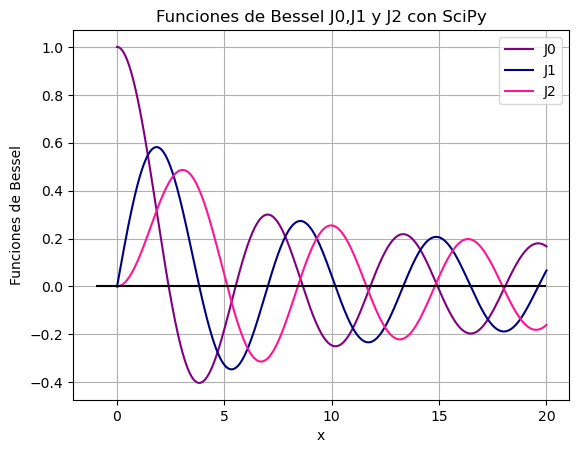

In [5]:
from scipy import special

J0s=special.jv(0,x)
J1s=special.jv(1,x)
J2s=special.jv(2,x)

plt.plot(x,J0s,color='purple',label='J0')
plt.plot(x,J1s,color='navy',label='J1')
plt.plot(x,J2s,color='deeppink',label='J2')
plt.hlines(y=0,xmin=-1,xmax=20,color='black')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('Funciones de Bessel')
plt.title('Funciones de Bessel J0,J1 y J2 con SciPy')
plt.grid(True)

(c) Escribe un segundo programa que haga una gráfica de densidad de la intensidad del patrón de difracción circular de una fuente de luz puntual con $\lambda=500nm$, en una región cuadrada del plano focal.

In [6]:
# Hacemos una meshgrid de x y y para pooder asignales un colorl
l=5e-7
k=2*np.pi/l

Xm=np.linspace(-1e-6,1e-6,500)
Ym=np.linspace(-1e-6,1e-6,500)
X,Y=np.meshgrid(Xm,Ym)
r=np.sqrt(X**2+Y**2)
I=(J(1,k*r)/(k*r))**2
I[250,250]=1/2

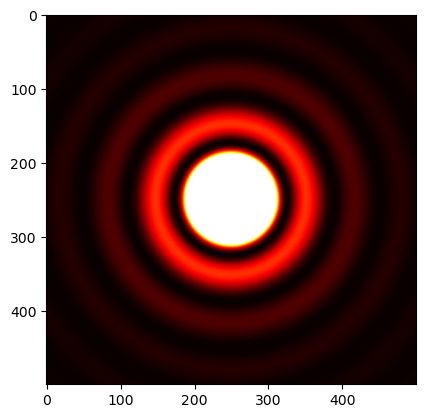

In [7]:
plt.imshow(I,cmap='hot',vmax=0.01)

# PROBLEMA 2: Error de estimación:

Calcula la integral $\int_0^{2}(x^{4}-2x+1) dx$ usando la regla trapezoidal con cortes de 20 pero esta vez haz que el programa tambien imprima una estimación del error en el resultado, calculado usando la ecuación $\epsilon=\frac{1}{3}(I_2-I_1)$

In [8]:
def integracion_trapezoidal(f,a,b,N):
    def Trapecio(f,a,b,N):
        dx=(b-a)/N
        s=(f(a)+f(b))/2
        for i in range(1,N):
            s+=f(a+i*dx)
        return s*dx
    int=Trapecio(f,a,b,N)
    error = (1/3)*abs(Trapecio(f,a,b,20)-Trapecio(f,a,b,10))
    return int,error
### Esta es la funcion a integrar
def fun2(x):
    return x**4-2*x+1

integral,error=integracion_trapezoidal(fun2,0,2,20)

print("El valor de la integral es:",integral)
print("El error de la integral es:",error)

El valor de la integral es: 4.426660000000001
El error de la integral es: 0.026633333333333137


(a)¿Cómo se compara el error calculado de esta manera con un cálculo directo del error como la diferencia entre su valor para l aintegral y el valor verdader 4.4? ¿Por qué los dos no concuerdan perfectamente?

R= El error calculado directamente de la diferencia entre 4.4 y el valor obtenido de la integral es de 0.02 mientras que el error calculado con el programa es de 0.026633, esto se debe a que la computadora no tiene una noción de "infinitas rebanadas" o rebanadas infinitamente pequeñas por lo que si queremos una mejor aproximación le tenemos que decir, que haga rebanadas cada vez mas pqueñas (las que nos permita el qeuipo de computo disponible) y aun asi no tendriamos una diferencia exacta debido a la manera en la que se guardan e imprimern los números en una computadora.

(b) Compara tus resultados con los proporcionados on la biblioteca de scipy que implementa la regla trapezoidal

In [9]:
from scipy import integrate
integral=integrate.trapezoid(fun2(np.linspace(0,2,1000)),np.linspace(0,2,1000))
print("La integral con scipy es:",integral)

La integral con scipy es: 4.400010688030972


la biblioteca scipy tiene una mejor aproximación al valor verdadero de la integral, esto porque por defaulta hace mas rebanadas que el método que se hizo en clase.

# PROBLEMA 3: Capacidad calorífica de un sólido

La teoría de solidos de Debye dice que la capacidad calorífica de un sólido a una temperatura T esta dada por:
\begin{equation}
    C_v=9V\rho k_B\left(\frac{T}{\theta_D}\right)^{3}\int_0^{\theta_D/T}\frac{x^{4}e^{x}}{\left(e^{x}-1\right)^{2}}dx
\end{equation}
Con $V$ el volumen del sólido, $\rho$ la densidad númerica de los átomos, $k_B$ la constnte de Boltzmann y $\theta_D$ la temperatura de Debye.

(a) Escribe una funcion $C_v(T)$ que calcule la $C_v$ para un valor dado de tempratura de una muestra que consta de 1000 centímetros cubicos de aluminio sólido con densidad númerica de $\rho=6.022\times 10^{28}m^{-3}$ y una temperatura de Debye de $\theta_D=428K$, utiliza la cuadratura Gaussiana con N=50 puntos

In [10]:
#usamos la funcion de cuadratura gaussiana que hizo mark newnman para obtener los valors Xk 
#(las raices de los polinomios de legendre) y los pesos wk

## Hacemos la funcion para obtener Cv para un valor dado de temperatura
V=0.001 #1000cm³=0.001cm³
kb=1.380649e-23
rho=6.022e28
theta_d=428

def Cv(T):
    from gaussxw import gaussxwab
    #Obtenemos los valores Xk y los pesos Wk
    x,w = gaussxwab(50,0,theta_d/T)
    ### Hacemos la funcion de la integral
    def func_int(x):
        num = np.exp(x)*x**4
        dem = (np.exp(x)-1)**2
        return num/dem
    ### integramos con la cuadratura de gauss
    int=0
    for i in range(len(x)):
        int+=func_int(x[i])*w[i]
    ### multiplicamos la constante por la integral
    ### y 1000cm³=0.001m³
    cv=(9*V*rho*kb*(T/theta_d)**3)*int
    return cv

(b) Usa tu función para hacer una gráfica de la capacidad calorífica en función de la temperatura desde $T=5k$ hasta $T=500k$.

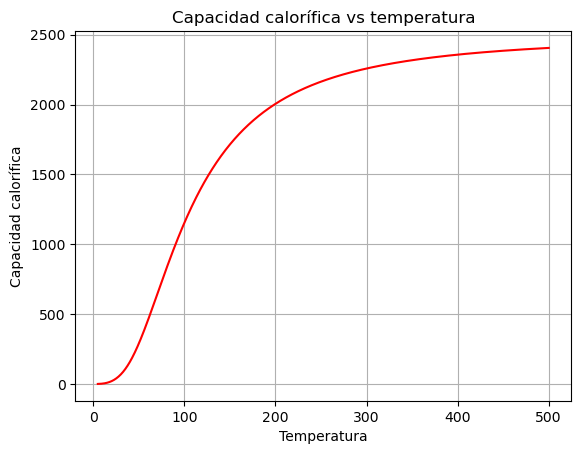

In [11]:
T=np.linspace(5,500,1000)
cv=[]
for i in range(len(T)):
    cv.append(Cv(T[i]))
cv=np.array(cv)

plt.plot(T,cv,color='red')
plt.xlabel("Temperatura")
plt.ylabel("Capacidad calorífica")
plt.title("Capacidad calorífica vs temperatura")
plt.grid(True)

# Problema 4: Incertidumbre de un oscilador armónico.

En unidades donde todas las constantes son 1, la función de onda del nésimo nivel de energía del pscilador armónico cuántico unidemensional esta dada por:
\begin{equation}
    \psi_n(x)=\frac{1}{\sqrt{2^{n}n!\sqrt{\pi}}}e^{-x^{2}/2}H_n(x)
\end{equation}
Donde H_n(x) son los polinomios de Hermite, los cuales cumplen la condición:
\begin{equation}
    H_{n+1}(x)=2xH_n(x)-2nH_{n-1}(x)
\end{equation}
Los dos primeros polinomios de Hermite son $H_0(x)=1$ y $H_1(x)=2x$

(a) Escribe una función H(n,x) que calcule $H_n(x)$ dados x y cualquier número enterp $n\geq 0$. Utiliza tu función para hacer una gráfica que muestre las funciones de onda del oscilador armónico para $n=0,1,2,3$, todos en el mismo gráfico en el rango de $x=-4,x=4$

In [12]:
from math import *
## FUNCION DE LOS POLINOIMOS DE HERMITE
def H(n,x):
    H0=1
    H1=2*x
    if n==0:
        return H0
    elif n==1:
        return H1
    else:
        # en este else estamos recorriendo la n un lugar por cada iteracion por lo que H_0 pasa a ser
        # H_1 y H_1 pasa a ser H.
        for i in range(1,n):
            H=(2*x*H1)-(2*i*H0)
            H0=H1
            H1=H
        return H

In [13]:
## funcion de la funcion de onda
def funcion_onda(n,x):
    num=np.exp(-(x**2)/2)*H(n,x)
    dem=np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi))
    return num/dem
    

In [14]:
## Hacemos los valores a graficar de cada funcion de onda
x=np.linspace(-4,4,1000)
psi0=[]
psi1=[]
psi2=[]
psi3=[]
for i in x:
    psi0.append(funcion_onda(0,i))
    psi1.append(funcion_onda(1,i))
    psi2.append(funcion_onda(2,i))
    psi3.append(funcion_onda(3,i))

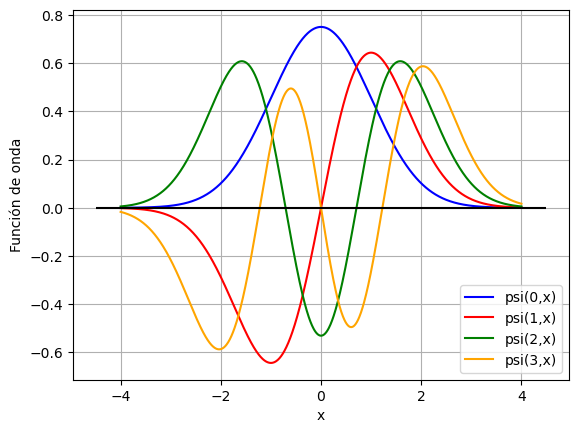

In [15]:
#Graficamos
plt.plot(x,psi0,color='blue',label='psi(0,x)')
plt.plot(x,psi1,color='red',label='psi(1,x)')
plt.plot(x,psi2,color='green',label='psi(2,x)')
plt.plot(x,psi3,color='orange',label='psi(3,x)')
plt.xlabel('x')
plt.ylabel('Función de onda')
plt.hlines(y=0,xmin=-4.5,xmax=4.5,color='black')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

(b) Haz una función de onda a parte para n=30 desde x=-10 a x=10

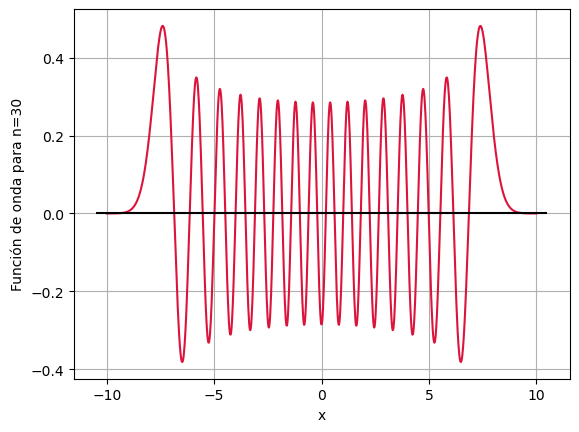

In [16]:
x30=np.linspace(-10,10,1000)
psi30=[]
for i in x30:
    psi30.append(funcion_onda(30,i))

plt.plot(x30,psi30,color='crimson')
plt.xlabel('x')
plt.ylabel('Función de onda para n=30')
plt.hlines(y=0,xmin=-10.5,xmax=10.5,color='black')
plt.grid(True)

(c) La incertidumbre de un oscilador armónico cuántico se puede cuantificar mediante su media cuadrática $\sqrt{\langle x^{2}\rangle}$ donde:
\begin{equation}
    \langle x^{2}\rangle = \int_\infty^\infty x^{2}|\psi_n(x)|^{2}dx
\end{equation}
Escribe un programa que evalúe esta integral usando la cuadratura gaussiana en 100 puntos y luego calcula la incertidumbre (la posición media cuadrática de la partículaa) para unvalor dado de n. Calcula la incertidumbre para n=5.

Primero gráficamos la función dentro de la integral para saber el rango de límites de integración.

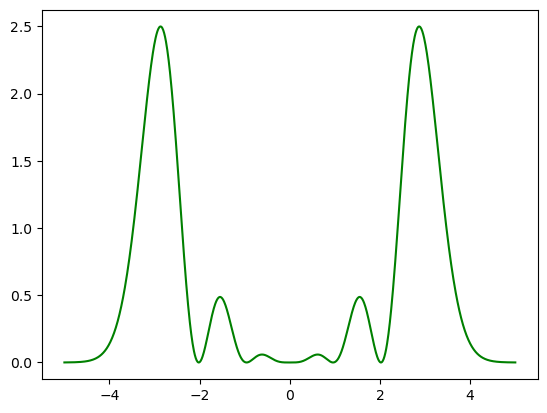

In [17]:
### con esta gráfica mos podemos dar una idea visual de que en valores podemos considerarlos bastante grandes 
### para que se tenga un comportamiento
### asintotico en nuestra funcion, ya que la computadora no sabe lo que es integrar de -infinito a infinito
x=np.linspace(-5,5,1000)
ec=[]
def int1(n,x):
    return (x**2)*(abs(funcion_onda(n,x))**2)
for i in x:
    ec.append(int1(5,i))
plt.plot(x,ec,color='green')

### los límites de integracion -5 y 5 son suficientes para que la gráfca tenga un comportamiento asintótico y vamos a integrar desde ahí.

Corremos nuestra integral de -5 a 5

In [18]:
### Hacemos el programa para evaluar la integral de -5 a 5
def media_cuadratica(n,a,b):
    from gaussxw import gaussxwab
    #Obtenemos los valores Xk y los pesos Wk
    x,w = gaussxwab(100,a,b)
    ### Hacemos la funcion de la integral
    def func_int(n,x):
        return (x**2)*(abs(funcion_onda(n,x))**2)
    ### integramos con la cuadratura de gauss
    int=0
    for i in range(len(x)):
        int+=func_int(n,x[i])*w[i]

    ### obtenemos la incertidumbre (su media cuadrática)
    return np.sqrt(int)


print("La media cuadrática es:",media_cuadratica(5,-5,5))

La media cuadrática es: 2.3451896081212955


# Problema 5: Atracción gravitacional de una lámina uniforme.

(a) Considera la fuerza gravitacional debida a la placa que siente una masa puntual de 1kg a una distancia z del centro del cuadrado, en dirección perpendicular a la lámina, demuestra que la componente de la fuerza a lo largo del eje z es:
\begin{equation}
    F_z=G\sigma z\int\int_{-L/2}^{L/2}\frac{dx dy}{(x^{2}+y^{2}+z^{2})^{3/2}}
\end{equation}
Donde $G=6.674\times10^{-11}m^{3}kg^{-1}s^{-2}$ es la constante gravitacional de Newton y $\sigma$ es la masa por unidad de área de la hoja

(b)Escribe un programa para calcular y gráficar la fuerza en función de z de z=0 a z=10m. Para la integral doble utiliza la cuadrtura gaussiana (doble)
\begin{equation}
    I\approx \sum_{i=1}^{N}\sum_{j=1}^{N}w_iw_jf(x_i,x_j)
\end{equation}

In [19]:
### Primero calculamos el valor número de la densidad ssuperficial
sigma=1e4/100
G=6.674e-11
### obtenemos los pesos para la dimension de largo y alto de la hoja.
### si ponemos el eje coordenado en el centro de la lamina entonces el largo ancho iria de -10 a 10 y el ancho
### igual iria de -10 a 10
def gravedad_lamina(z,a,b):
    from gaussxw import gaussxwab
    xp,wp=gaussxwab(100,a,b)
    def distancia(x,y,z):
        return 1/(x**2+y**2+z**2)**(3/2)
    z=np.linspace(0,z,100)
    gravedad=[]
    for k in z:
        int=0
        for i in range(len(z)):
            for j in range(len(z)):
                int+=wp[i]*wp[j]*distancia(xp[i],xp[j],k)
        np.array(gravedad.append(int*k*sigma*G))
    return np.array(gravedad)

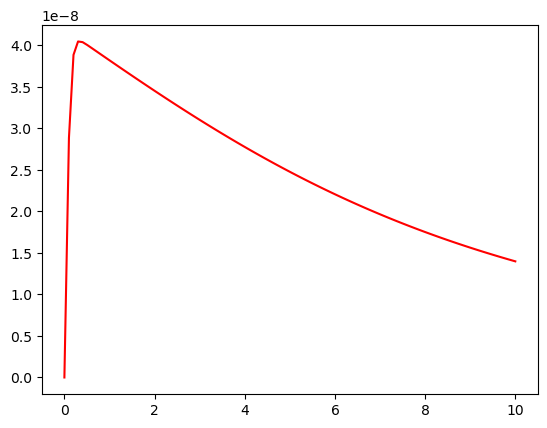

In [20]:
z=np.linspace(0,10,100)
gravedad=gravedad_lamina(10,-10,10)

plt.plot(z,gravedad,color='red')

(c) Debeías de ver una urva suave, excepto en los valores muy pequeños de z donde la fuerza deberia caer repentinamente a cero. Esa caída no es un efecto real, sino un artefacto en la forma en la que hemos realizado el cálculo. Explica brevemente de dónde viene este artefacto y sugiere una estrategia para eliminarlo o al menos diminuir su tamaño.

# Problema 6: Diferenciación númerica.

Crea una función f(x) que devuelva el valor de $1+\frac{1}{2}tanh(2x)$ y usa una diferencia central para calcular la derivada de la función en el rango $-2\leq x\leq 2$.
Calcula la derivada analíticamente y haz una gráfica con tu resultado numerico y la respuesta analítica en el mismo gráfico.

In [21]:
from math import *
def f_tan(x):
    return 1 + ((1/2)*tanh(2*x))

In [22]:
### funcion de diferencia central.
### esta funcion da el valor de la derivada en un punto x
def diferencia_central(f,x,a,b,N):
    h = (b-a)/N
    fa=f(x-(h/2))
    fad=f(x+(h/2))
    return (fad-fa)/h

x=np.linspace(-2,2,100)
derivada = []
for i in x:
    derivada.append(diferencia_central(f_tan,i,-2,2,100))

In [23]:
#### la derivada analítica de la expresión es Sech(2x)^{2} y sech=1/cosh
df_tan=[]
for i in x:
    df_tan.append(1/(cosh(2*i))**2)

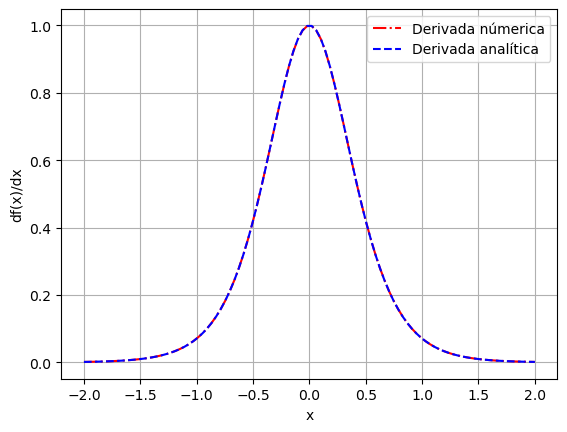

In [24]:
plt.plot(x,derivada,color='red',linestyle='-.',label='Derivada númerica')
plt.plot(x,df_tan,color='blue',linestyle="--",label='Derivada analítica')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('df(x)/dx')
plt.grid(True)
plt.show()

# Problema 7: Procesamiento de imágenes y STM

(a) En el archio "altitudes.txt" contitne la altitud $w(x,y)$ en metros sobre el nivel de mar. Escribe un programa que lea el archivo "altitudes.txt" y almacene los datos en una matriz. Luego calcula las derivadas $\frac{\partial w}{\partial x}$ y $\frac{\partial w}{\partial y}$.
Paraa calcular laas derivadas, necesigtarás saber el valor de h y la distancia en metros entre puntos de la cuadrícculaa, que es de aproximadamente 30,000m

(512, 1024)


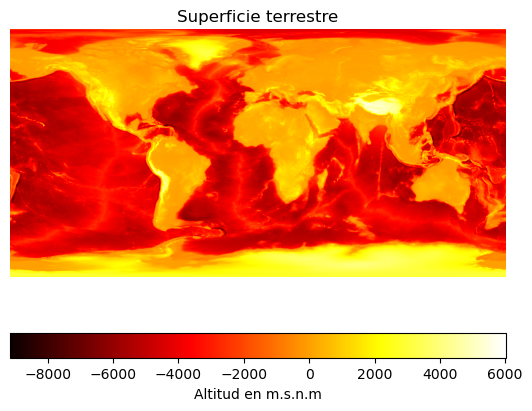

In [25]:
altitudes = np.loadtxt('altitudes.txt')
print(altitudes.shape)
plt.imshow(altitudes,cmap='hot')
plt.axis(False)
plt.title('Superficie terrestre')
plt.colorbar(orientation='horizontal',label='Altitud en m.s.n.m')

In [26]:
### Hacemos las funciones para derivar por adeleante y por atras los valores de una lista.
def dif_for(f,i,h):
    return (f[i+1]-f[i])/h
def dif_back(f,i,h):
    return (f[i]-f[i-1])/h

In [27]:
### Hacemos las derivadas parciales en la dimension x
h=30000
dx=[]
for i in range(len(altitudes[:,0])):
    d=[]
    for j in range(len(altitudes[0])):
        if j < len(altitudes[0])-1:
            derivadax = dif_for(altitudes[i],j,h)
        elif j == len(altitudes[0]):
            derivadax = dif_back(altitudes[i],j,h)
        d.append(derivadax)
    dx.append(d)
### Hacemos las derivadas parciales en la dimension y
dy=[]
for i in range(len(altitudes[0])):
    d=[]
    for j in range(len(altitudes[:,0])):
        if j < len(altitudes[:,0])-1:
            derivaday = dif_for(altitudes[:,i],j,h)
        elif j == len(altitudes[:,0]):
            derivaday = dif_back(altitudes[:i],j,h)
        d.append(derivaday)
    dy.append(d)

dx=np.array(dx)
### para poder operar entre las matrices, tomamos la traspuesta de dy para tener la misma dimension.
dy=np.transpose(np.array(dy))

In [28]:
print(dy.shape)
print(dx.shape)

(512, 1024)
(512, 1024)


(b) Ahora usando tus valores para las derivadas, calcula la intensidad para cada punto de la cuadrícula con $\phi=45^{\circ]$ y haz un gráfico de la densidad de los valores resultantes en el que el brillo de cada punto depende de la corrrespondiente valor de intensidad.
\begin{equation}
    I=\frac{cos(\phi)\frac{\partial w}{\partial x}+sin(\phi)\frac{\partial w}{\partial y}}{\sqrt{\left(\frac{\partial w}{\partial x}\right)^{2}+\left(\frac{\partial w}{\partial y}\right)^{2}+1}}
\end{equation}

(-0.5, 1023.5, 511.5, -0.5)

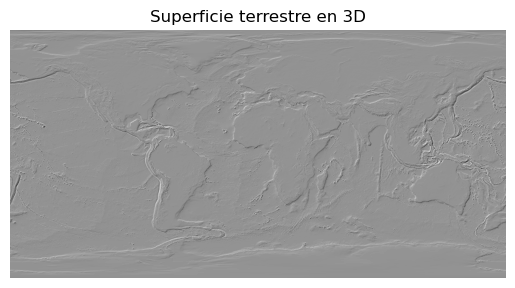

In [34]:
intensidad=((np.sqrt(2)/2)*dx + (np.sqrt(2)/2)*dy)/(np.sqrt(dx**2+dy**2)+1)
plt.imshow(intensidad,cmap='gray')
plt.title('Superficie terrestre en 3D')
plt.axis(False)

(c) El otro archivo STM.txt contiene una cuadrícula con valores de mediciones de un microscopio de efecto túnel. Un microscopio de efecto tunel es un dispositivo que mide la forma de superficies a nivel atómico.
El resultado final es una cuadrícula de valores que representan la altura de la superficie en función de la posición y los datos del archivo stm.txt contienen esos valores.
Modifica tu programa anterior para visualizar los datos STM y así crear una imagen 3D de cómo se ve la superficie de sil

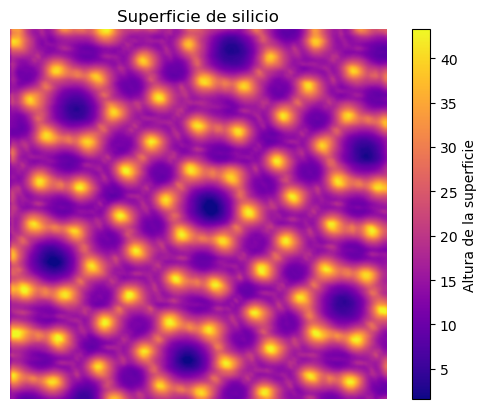

In [30]:
stm = np.loadtxt('stm.txt')
plt.imshow(stm,cmap='plasma')
plt.axis(False)
plt.title('Superficie de silicio')
plt.colorbar(label='Altura de la superficie')

In [31]:
#### re hhacemos el codigo pero ahora para los valores de stm

h=2.5
dx_stm=[]
for i in range(len(stm[:,0])):
    d=[]
    for j in range(len(stm[0])):
        if j < len(stm[0])-1:
            derivadax = dif_for(stm[i],j,h)
        elif j == len(stm[0]):
            derivadax = dif_back(stm[i],j,h)
        d.append(derivadax)
    dx_stm.append(d)
### Hacemos las derivadas parciales en la dimension y
dy_stm=[]
for i in range(len(stm[0])):
    d=[]
    for j in range(len(stm[:,0])):
        if j < len(stm[:,0])-1:
            derivaday = dif_for(stm[:,i],j,h)
        elif j == len(stm[:,0]):
            derivaday = dif_back(stm[:i],j,h)
        d.append(derivaday)
    dy_stm.append(d)

dx_stm=np.array(dx_stm)
### para poder operar entre las matrices, tomamos la traspuesta de dy para tener la misma dimension.
dy_stm=np.transpose(np.array(dy_stm))

(-0.5, 675.5, 662.5, -0.5)

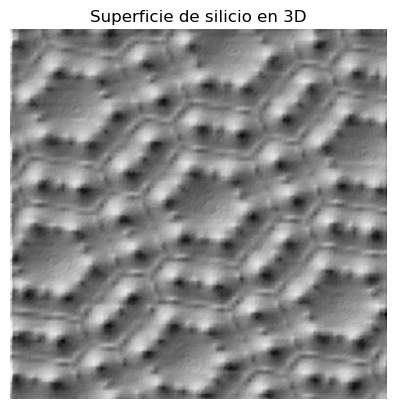

In [32]:
intensidad_stm=(np.cos(np.pi/4)*dx_stm+np.sin(np.pi/4)*dy_stm)/np.sqrt(dx_stm**2+dy_stm**2+1)
plt.imshow(intensidad_stm,cmap='Greys_r')
plt.title('Superficie de silicio en 3D')
plt.axis(False)